# Script #2

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
papers = pd.read_csv("tabela_1_ed_sem_2019.csv", sep=",", index_col=[0])

In [3]:
papers.head(3)

,Journal,Title,Authors,Year,Abstract
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",['Baek Kiwoon' 'Choi Ahyoung' 'Lee Yung Mi' 'L...,2018,"A Gram-stain-negative, non-motile, oxidase- an..."
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",['Ruan Chu-Jin' 'Zheng Xiao-Wei' 'Wang Jian' '...,2018,"A novel aerobic, Gram-stain-negative bacterium..."
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,['Kaminski Michal A' 'Sobczak Adam' 'Spolnik G...,2018,"An aerobic, Gram-stain-negative, rod-shaped, n..."


## Número de itens por revista

In [4]:
top_journals = pd.DataFrame(papers["Journal"].value_counts().head(5)).reset_index()
top_journals

,index,Journal
0,International journal of systematic and evolut...,7740
1,Antonie van Leeuwenhoek,683
2,Systematic and applied microbiology,297
3,"Journal of microbiology (Seoul, Korea)",168
4,Current microbiology,161


In [5]:
top_journals.columns = ["Name", "Frequency"]

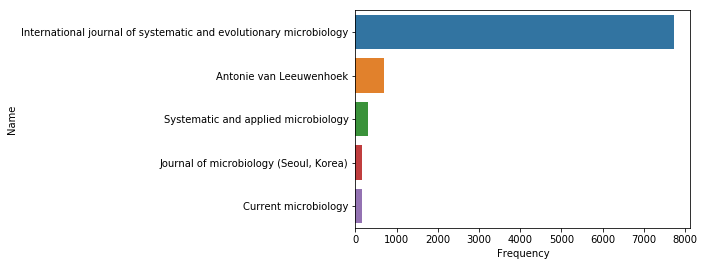

In [6]:
sns.barplot(x='Frequency', y='Name', data=top_journals)

## Número de itens por revista por ano 

In [7]:
per_year = papers["Year"].value_counts()

In [8]:
per_year = pd.DataFrame(papers["Year"].value_counts().reset_index())
per_year.columns = ['year', 'count']
per_year = per_year.sort_values(by="year")

In [9]:
df_not_top = papers[(papers["Journal"] != "International journal of systematic and evolutionary microbiology")] #todas menos IJSEM

In [10]:
df_not_top_by_year = df_not_top.groupby(["Year"])

In [11]:
df_count_year_not_top = pd.DataFrame(df_not_top_by_year.describe())["Journal"]["count"]

In [12]:
df_count_year_not_top

Year
2001     24
2002     36
2003     51
2004     64
2005     64
2006     47
2007     68
2008     60
2009     66
2010     97
2011    112
2012    144
2013    213
2014    216
2015    281
2016    179
2017    142
2018    147
Name: count, dtype: object

In [13]:
df_count_year_not_top = df_count_year_not_top.reset_index()
df_count_year_not_top["count"] = df_count_year_not_top["count"].astype("int64")


In [14]:
df_count_year_not_top

,Year,count
0,2001,24
1,2002,36
2,2003,51
3,2004,64
4,2005,64
5,2006,47
6,2007,68
7,2008,60
8,2009,66
9,2010,97


In [15]:
ijsem = papers[papers["Journal"] == "International journal of systematic and evolutionary microbiology"] #IJSEM

In [16]:
ijsem_year = pd.DataFrame(ijsem["Year"].value_counts().reset_index())
ijsem_year.columns = ['year', 'count']
ijsem_year = ijsem_year.sort_values(by="year").reset_index(drop=True)

In [17]:
ijsem_year

,year,count
0,2001,155
1,2002,198
2,2003,218
3,2004,266
4,2005,312
5,2006,369
6,2007,434
7,2008,426
8,2009,463
9,2010,437


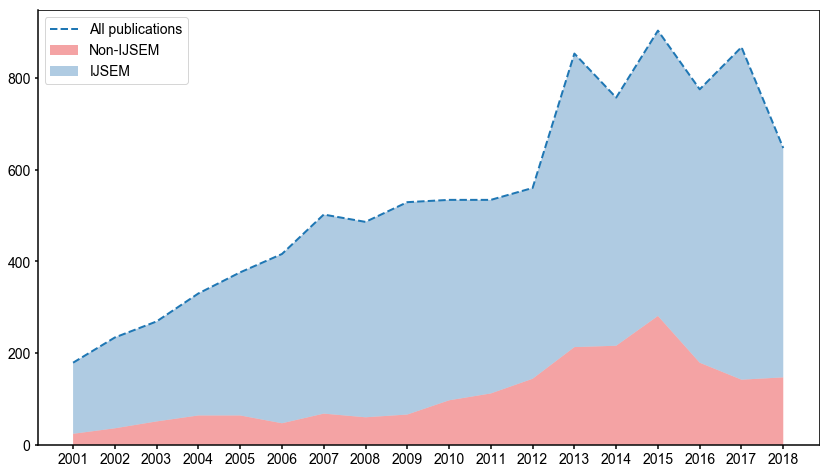

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import savefig
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

fig, ax = plt.subplots(figsize=(14,8))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
pal = sns.color_palette("Set1")
plt.xticks(ijsem_year["year"])
plt.plot(per_year['year'], per_year['count'], linewidth=2, label="All publications", ls="dashed")
plt.stackplot(ijsem_year["year"], df_count_year_not_top["count"], ijsem_year["count"], labels=['Non-IJSEM','IJSEM'], colors=pal, alpha=0.4)
plt.legend(loc='upper left', prop={'size': 14})

#savefig("fig_2.eps")